<a href="https://colab.research.google.com/github/locoblueog/locoblueog/blob/main/Week2/TMDL_2024_25_Lecture_Notebook_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Turing Machine & Deep Learning
*Author: Satchit Chatterji (satchit.chatterji@gmail.com)*

## Lecture 2: Supervised ML (Classification)
> Today's question: How can I classify handwritten digits?

The MNIST dataset is a widely used benchmark dataset in machine learning and computer vision. It consists of a collection of 70,000 grayscale images of handwritten digits from 0 to 9. Each image is a 28x28 pixel square, making it a 28x28 matrix of numerical values. The MNIST dataset is often used for tasks such as digit recognition and serves as a fundamental dataset for developing and evaluating various image classification algorithms and models.

Today, we'll try to classify digits in this dataset using methods we learnt in the lecture.

#### Learning outcomes:
- Using benchmark data sets (MNIST)
- Reshaping inputs, outputs
- Logistic Regression
- Decision Trees
- Random Forests
- SVMs

# Loading MNIST

Because it is so popular, we can get an easily-accessible version via e.g. [TensorFlow](https://www.tensorflow.org/) that already comes with a test/train split.

In [ ]:
# get dataset
from tensorflow.keras.datasets import mnist
# get common libraries
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

## Exploring MNIST

In [ ]:
(train_X, train_y), (test_X, test_y) = mnist.load_data()

### Label distribution

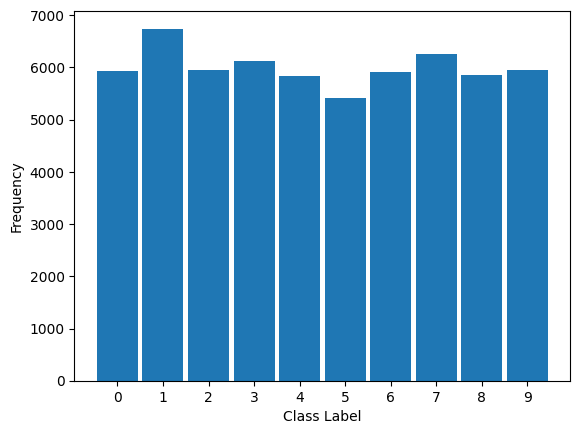

In [ ]:
plt.hist(train_y, bins=10, rwidth=0.9)
plt.xticks(0.9*np.arange(10)+0.45, range(10))
plt.ylabel("Frequency")
plt.xlabel("Class Label")
plt.show()

### Exploring the images

In [ ]:
print(train_X.shape)

(60000, 28, 28)


In [ ]:
train_y[0]

5

In [ ]:
print(train_X[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 18

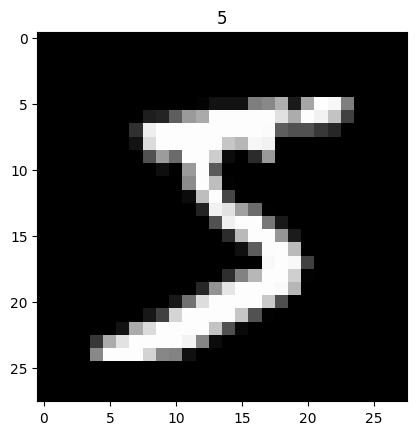

In [ ]:
plt.imshow(train_X[0], cmap=plt.get_cmap('gray'))
plt.title(train_y[0])
plt.show()

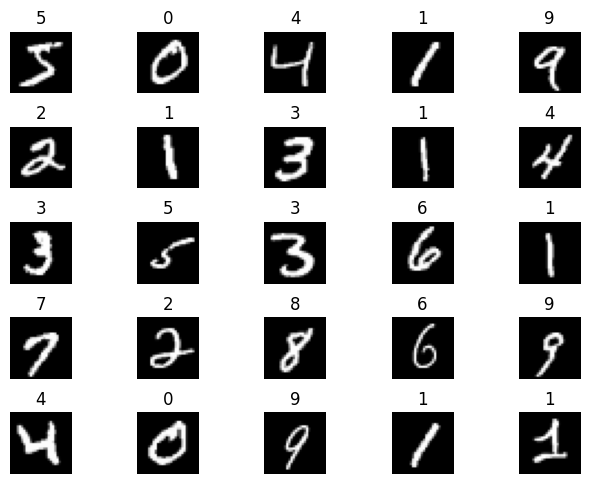

In [ ]:
fig, axs = plt.subplots(5,5)
axs = axs.flatten()
fig.tight_layout(pad=0.3)

for i, ax in enumerate(axs):
    ax.imshow(train_X[i], cmap=plt.get_cmap('gray'))
    ax.set_title(train_y[i])
    ax.axis("off")

## Reshaping MNIST

#### `.shape()`
The `.shape` attribute of a NumPy array returns the dimensions of the array. This is useful to understand the structure of data, especially in machine learning when handling tensors or matrices.

Example:

In [ ]:
print(train_X.shape)

NameError: name 'train_X' is not defined

#### `.flatten()`
The `.flatten()` method converts a multi-dimensional array into a one-dimensional array. This is useful when we need to transform images into a format suitable for machine learning models.

In [ ]:
flat_image = train_X[0].flatten()
print(flat_image.shape)
#Here, the 28x28 image has been reshaped into a single vector of 784 elements.


(784,)


### Applying this to the entire matrix

The ML algorithms used in this notebook usually expect the input to be a vector, and not a matrix. Thus, we need to reshape the samples into a single vector.

If we were to apply `.flatten()` to train_X, it would become a one-dimensional vector, with 47040000 (=6000\*28\*28) elements. Thus, in this case `.reshape(d1, d2)` is used, where d1 is the length of the new array (6000 here), and d2 is the width of the new array (28*28 here).

In [ ]:
def flatten_mnist(samples):
    return samples.reshape((len(samples), 28*28))

def unflatten_mnist(image):
    return image.reshape(28,28)

train_X, test_X = flatten_mnist(train_X), flatten_mnist(test_X)

# Loss Function

As was discussed in the lecture, learning algorithms "fit" the model by minimizing the empirical risk using a loss function

>$L$ : $\mathbb{R}^M$ x $\mathbb{R}^M$ $→$ $\mathbb{R}^{\geq0}$

For example, the LogisticRegression() model of scikit-learn (without weights or a regularization term) uses the following loss function:

>$-\sum^{n}_{i=1} (y_ilog(p(X_i)) + (1-y_i)log(1-p(X_i)))$,

Where $p(X_i) = P(y_i = 1|X_i) = \frac{1}{1+exp(-X_i)}$

Generally models use a version of MLE as their loss function, for some models you can specify different loss functions.

# Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

modelLR = LogisticRegression()  # create the logistic regression object
modelLR = modelLR.fit(train_X, train_y)  # fit on trainings data
modelLR.intercept_, modelLR.coef_  # estimated coefficients

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


(array([-6.61940960e-05,  4.73003406e-05,  5.36508332e-05, -7.16796069e-05,
         9.66199882e-06,  3.51673869e-04, -2.41825060e-05,  1.13381684e-04,
        -3.43023080e-04, -7.05894369e-05]),
 array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]))

In [ ]:
from sklearn.linear_model import LogisticRegression

modelLR = LogisticRegression()  # create the logistic regression object
modelLR = modelLR.fit(train_X, train_y)  # fit on training data

### Metrics

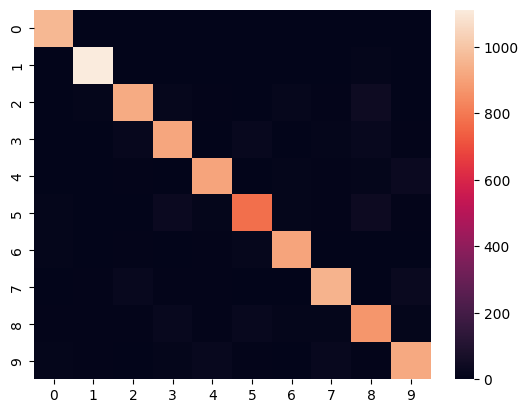

In [ ]:
from sklearn.metrics import confusion_matrix as cm

pred_y = modelLR.predict(test_X)
sns.heatmap(cm(test_y, pred_y))
plt.show()

The raw confusion matrix for such an accurate baseline model doesn't seem to be too helpful. Instead, we can get the metrics computed directly for us.

In [ ]:
# use a function from sklearn
from sklearn.metrics import classification_report

print("Logistic Regression")
print(classification_report(test_y, pred_y, digits=4))

Logistic Regression
              precision    recall  f1-score   support

           0     0.9544    0.9827    0.9683       980
           1     0.9678    0.9797    0.9737      1135
           2     0.9297    0.8973    0.9132      1032
           3     0.9034    0.9069    0.9051      1010
           4     0.9343    0.9267    0.9305       982
           5     0.9034    0.8700    0.8864       892
           6     0.9430    0.9499    0.9464       958
           7     0.9314    0.9251    0.9283      1028
           8     0.8673    0.8922    0.8796       974
           9     0.9120    0.9138    0.9129      1009

    accuracy                         0.9255     10000
   macro avg     0.9247    0.9244    0.9244     10000
weighted avg     0.9255    0.9255    0.9254     10000



For now, and what is common for balanced datasets, is to use accuracies as a good inital metric to see how your model is doing. So let's just compute them directly and display them for both the training and test set.

In [ ]:
def get_accuracies(model, train_X, train_y, test_X, test_y):
    print("Training score:", model.score(train_X, train_y))
    print("Testing score: ", model.score(test_X, test_y))

get_accuracies(modelLR, train_X, train_y, test_X, test_y)

Training score: 0.9339166666666666
Testing score:  0.9255


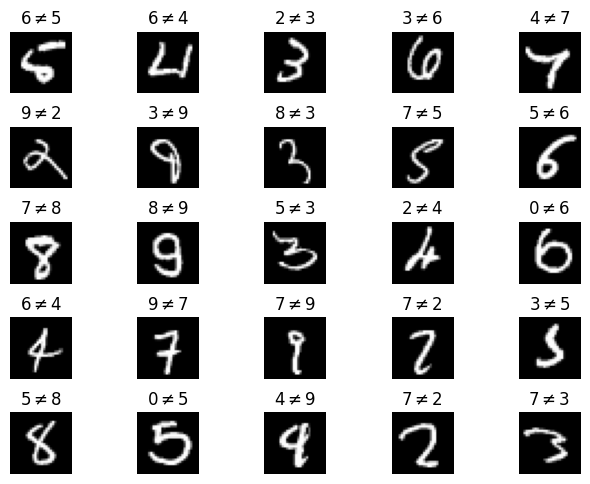

In [ ]:
def show_incorrect_preds(pred_y, test_X, test_y):
    incorrect_idxs = pred_y!=test_y

    incorrect_pred_y = pred_y[incorrect_idxs]
    incorrect_test_X = test_X[incorrect_idxs]
    incorrect_test_y = test_y[incorrect_idxs]

    fig, axs = plt.subplots(5,5)
    axs = axs.flatten()
    fig.tight_layout(pad=0.3)

    for i, ax in enumerate(axs):
        ax.imshow(unflatten_mnist(incorrect_test_X[i]), cmap=plt.get_cmap('gray'))
        ax.set_title(fr"{incorrect_pred_y[i]}$\neq${incorrect_test_y[i]}")
        ax.axis("off")

show_incorrect_preds(pred_y, test_X, test_y)

# Decision Tree

A **Decision Tree** is a supervised learning algorithm used for **classification and regression tasks**.
Decision Trees can be used for both classification and regression:

**Decision Tree Classifier** → Predicts categorical labels (e.g., spam vs. not spam).
**Decision Tree Regressor** → Predicts continuous values (e.g., house prices).


It is structured like a tree where:  
- **Nodes** represent attributes (features).  
- **Branches** represent decision rules.  
- **Leaves** represent outcomes (class labels).  

### **Advantages of Decision Tree**
- **Simple & Interpretable**: Mimics human decision-making.  
- **Handles Numerical & Categorical Data**: Works with different data types.  
- **No Need for Feature Scaling**: Unlike SVMs or Logistic Regression.  
- **Captures Non-Linearity**: Suitable for complex decision boundaries.
- Visually Appealing and interpretable




### Decision Tree Splitting: How It Chooses the Best Feature

A Decision Tree selects the **best feature** for splitting using **mathematical criteria**:

 **1. Gini Impurity**
- Measures how **mixed** the labels are in a node.
- **Lower is better** (pure nodes are preferred).

$$
Gini = 1 - \sum p_i^2
$$

Where:
- $p_i$ is the probability of class $i$.
- A **lower Gini score** means purer nodes.


 **2. Entropy & Information Gain**
- **Entropy** measures the level of **randomness** in a node.
- **Information Gain** calculates how much entropy **decreases** after a split.
- **Higher Information Gain is better.**

$$
H(S) = - \sum p_i \log_2(p_i)
$$

Where:
- $H(S)$ is the entropy of the system.

 **Information Gain Formula**:

$$
IG = H(Parent) - \sum \left(\frac{N_{child}}{N_{total}} H(child) \right)
$$

- A **higher Information Gain** means a **better split**.




In [ ]:
from sklearn import tree

modelDT = tree.DecisionTreeClassifier(max_depth=10)
modelDT = modelDT.fit(train_X, train_y)

In [ ]:
print("Decision Tree")
get_accuracies(modelDT, train_X, train_y, test_X, test_y)

Decision Tree
Training score: 0.8995333333333333
Testing score:  0.866


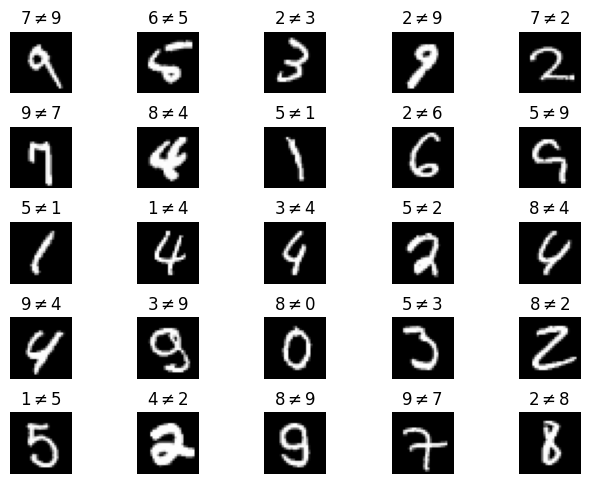

In [ ]:
pred_y = modelDT.predict(test_X)
show_incorrect_preds(pred_y, test_X, test_y)

## Random Forests
Random Forest is an ensemble learning method that combines multiple Decision Trees to improve accuracy and reduce overfitting. It is widely used for both classification and regression tasks.

Key Idea: Instead of relying on a single Decision Tree, Random Forest builds multiple trees and averages their predictions for better accuracy.

Advantages of Random Forest
- More Accurate: Averages predictions from multiple trees, reducing variance.
- Less Overfitting: Unlike a single tree, a Random Forest is more generalizable.
- Handles Missing Data & Noise: Works well with noisy datasets.
- Feature Importance: Can rank the most significant features.
- Works for Classification & Regression: Flexible for different ML problems.

###**How does Random Forest work?**

**1. Bootstrapping (Bagging Technique)** → Each tree is trained on a random subset of data.

**2. Feature Randomness** → Each split considers only a random subset of features, making trees diverse.

**3. Majority Voting (Classification) or Averaging (Regression)** → The final prediction is made by combining all trees' outputs.

###**When to use Random Forest?**
- If your Decision Tree is overfitting.
- For high-dimensional datasets with many features.
- If you need a robust model for noisy data.
- When accuracy is more important than model interpretability.



In [ ]:
from sklearn.ensemble import RandomForestClassifier as RFC

modelRFC = RFC(100, max_depth=10)
modelRFC = modelRFC.fit(train_X, train_y)

In [ ]:
print("Random Forest")
get_accuracies(modelRFC, train_X, train_y, test_X, test_y)

Random Forest
Training score: 0.9634166666666667
Testing score:  0.9468


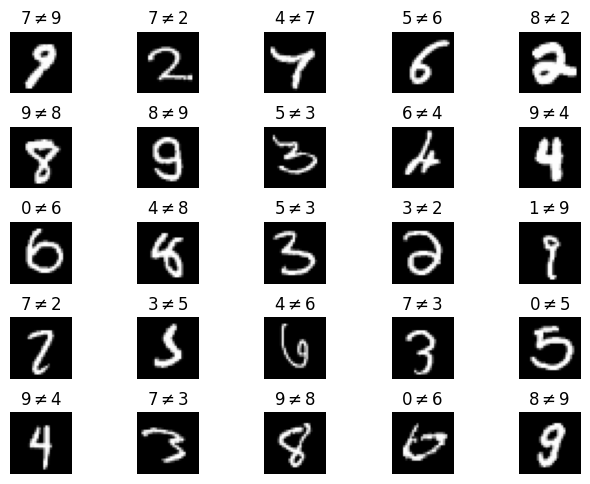

In [ ]:
pred_y = modelRFC.predict(test_X)
show_incorrect_preds(pred_y, test_X, test_y)

# SVMs

SVMs come in a number of flavors with a number of hyperparameters you can play around with. Try them all out here! Keep in mind that since we have so many high-dimensional data points, this method can be excruitiatingly slow.

In [ ]:
! python -m pip install scikit-learn-intelex
from sklearnex import patch_sklearn
patch_sklearn("SVC")

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 32.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 91.4/91.4 MB 6.6 MB/s eta 0:00:00


Intel(R) Extension for Scikit-learn* enabled (https://github.com/uxlfoundation/scikit-learn-intelex)


In [ ]:
from sklearn.svm import SVC

modelSVC = SVC(kernel="rbf", C=1)
modelSVC = modelSVC.fit(train_X, train_y)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


In [ ]:
print("SVM")
get_accuracies(modelSVC, train_X, train_y, test_X, test_y)

SVM


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Training score: 0.9899166666666667


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Testing score:  0.9792


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


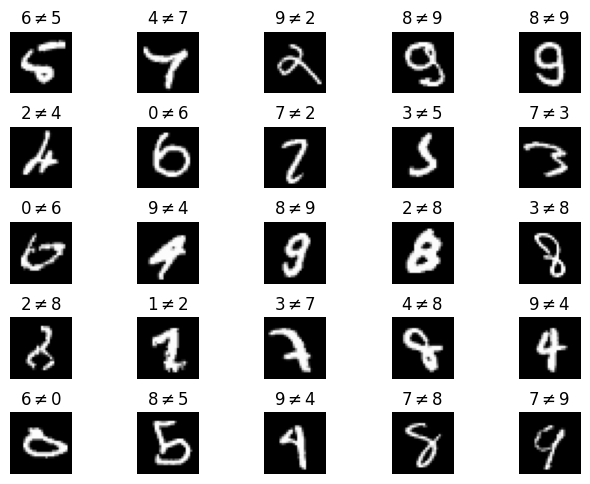

In [ ]:
pred_y = modelSVC.predict(test_X)
show_incorrect_preds(pred_y, test_X, test_y)

#Grid Search

Grid Search is a hyperparameter optimization technique used in machine learning to find the best combination of hyperparameters for a given model.

A Grid Search uses a specified subset of hyperparameter values, and iterates over every single combination of these hyperparameters. For every combination it trains the model, and evaluates it using a validation dataset. The goal is to identify the combination that results in the best performance according to a chosen evaluation metric (e.g., accuracy, F1-score, RMSE) by checking all possible combinations.

While a Grid Search is exhaustive, as it tries every possible combination. It can get computationally expensive quite fast for a large number of hyperparamters or large datasets, as you have to test all the combinations, and training the model takes time.